In [1]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [7]:
df = pd.read_csv('../../data/handlebar/processed_segments_overlap_50.csv') 
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9312,1.0,-1.575378,5.295975,5.295975,16.682800,19.517532,14.781799,14.609421,7.469910,11.252747,...,-6.689407,2.274490,4.649536,-18.933350,-24.708160,-21.212631,-3.002335,10.764328,19.019547,19.871872
9313,1.0,0.100555,-6.871353,3.026276,17.348389,15.734695,13.632584,13.632584,14.556747,12.014099,...,-22.385788,-30.980972,-23.218964,-6.301544,14.973343,18.669983,26.542114,38.690308,48.295837,53.400284
9314,1.0,6.004654,9.461884,15.811310,22.572540,20.719421,20.719421,7.910446,0.928955,-0.574615,...,4.922485,19.182343,20.283676,20.283676,12.129028,-3.567368,-3.567368,1.077393,9.370911,10.749970
9315,1.0,60.429657,25.072083,9.495407,-14.068329,-19.512741,-11.065994,2.049438,2.049438,10.376465,...,0.210693,0.804459,0.804459,11.267120,10.807434,8.063675,4.228165,4.505890,19.072205,19.072205


In [8]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)


In [9]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 1:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 1:])
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])



In [10]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[1:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[1:])
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
train_data_scaled_df.head()

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene
0,0.099842,0.367573,-0.760735,-0.741110,-0.643996,1.478013,1.460586,0.377973,-1.298170,-2.613329,...,-0.582613,-1.255213,-0.701392,0.471675,0.901263,0.321502,-0.614684,0.125772,0.418495,0.0
1,0.287473,-0.438213,-0.262225,-0.632199,0.733360,0.425447,0.325230,0.411709,-0.423649,0.776224,...,-0.527615,0.937265,1.770801,1.560933,-0.131658,-1.879847,-1.206281,-0.206123,0.528233,0.0
2,-0.889006,-0.240796,0.149586,0.175351,-0.117633,-0.764769,-1.020560,-0.874950,-0.199176,0.381914,...,-0.216459,-0.520273,-0.635812,-0.342957,0.028676,1.100680,0.824921,-0.265390,-0.858003,0.0
3,1.466225,1.286168,-0.577708,-1.422806,-0.696546,0.911753,0.885006,-0.045683,-1.041988,-0.455054,...,-3.053017,1.231087,2.014817,-2.399102,-6.967440,-6.682476,-0.651555,0.426846,-4.315520,0.0
4,-0.690028,-0.464805,1.045457,0.830425,0.002728,-1.053255,-0.338514,0.800059,0.798846,0.158502,...,-0.794318,-1.508160,-1.290846,0.791125,2.443709,1.781598,-0.239281,-0.758489,-0.189899,0.0


In [11]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-1]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-1]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   10,
       ...
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863],
      dtype='int64', length=1796)
Index([   7,   54,   63,   73,   92,   94,  119,  188,  204,  209,  218,  330,
        358,  363,  402,  412,  421,  456,  530,  553,  567,  584,  590,  597,
        757,  784,  796,  840,  891,  894,  949,  950,  955,  962,  978,  979,
        990, 1006, 1033, 1038, 1071, 1126, 1135, 1143, 1168, 1195, 1266, 1272,
       1274, 1275, 1279, 1359, 1384, 1399, 1409, 1442, 1462, 1472, 1520, 1521,
       1562, 1581, 1598, 1624, 1628, 1655, 1673, 1763],
      dtype='int64')


In [12]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [13]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation='tanh'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='tanh'),
            tf.keras.layers.Dropout(0.2), 
            tf.keras.layers.Dense(100, activation='tanh')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [14]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min')
model.compile(optimizer='adam', loss='mae')

In [15]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, 
                    normal_train_data_scaled,
                    epochs=150, 
                    batch_size=128,
                    validation_split=0.3, 
                    shuffle=True, 
                    callbacks=[early_stopping])

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4608 - val_loss: 0.3880
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3766 - val_loss: 0.3529
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3549 - val_loss: 0.3349
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3336 - val_loss: 0.3222
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3204 - val_loss: 0.3129
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3123 - val_loss: 0.3053
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3072 - val_loss: 0.2990
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2977 - val_loss: 0.2934
Epoch 9/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2896 - val_loss: 0.2883
Epoch 10/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2815 - val_loss: 0.2841
Epoch 11/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2895 - val_loss: 0.2800
Epoch 12/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2

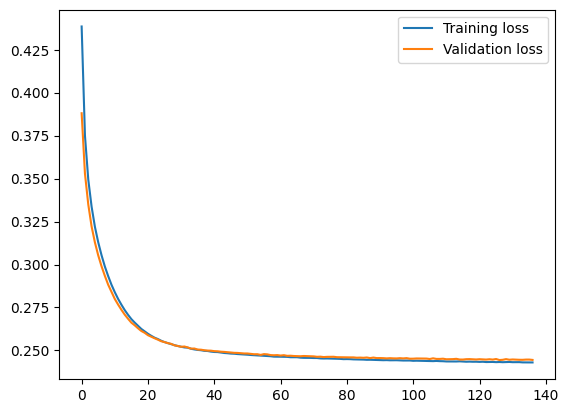

In [16]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()